In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
data = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

In [14]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


### now we can see dt feature is in which date(year,month,day) is stored but its data type is object so we chanage it into datetime

In [53]:
data['dt'] = pd.to_datetime(data['dt'])
data.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

### now we extract year,month and day and make new columns of it

In [54]:
data['year'] = data['dt'].dt.year
data['month'] = data['dt'].dt.month
data['day'] = data['dt'].dt.day
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month,day
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1,1
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,2,1
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,3,1
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,4,1
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,5,1


In [55]:
data.drop(columns=['dt','AverageTemperatureUncertainty'],inplace=True)

In [18]:
data.head()

,AverageTemperature,City,Country,Latitude,Longitude,year,month,day
0,26.704,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1,1
1,27.434,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,2,1
2,28.101,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,3,1
3,26.140,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,4,1
4,25.427,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,5,1


### now we handle null values which are present in our data set

In [25]:
data.isnull().mean()

AverageTemperature    0.045999
City                  0.000000
Country               0.000000
Latitude              0.000000
Longitude             0.000000
year                  0.000000
month                 0.000000
day                   0.000000
dtype: float64

In [24]:
data.shape

(239177, 8)

In [56]:
## in our data set there is just 4% data missing we can remove then 
data.dropna(inplace=True)

In [30]:
data.isnull().sum()

AverageTemperature    0
City                  0
Country               0
Latitude              0
Longitude             0
year                  0
month                 0
day                   0
dtype: int64

### now perform complete EDA on the data

In [32]:
data.head()

,AverageTemperature,City,Country,Latitude,Longitude,year,month,day
0,26.704,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1,1
1,27.434,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,2,1
2,28.101,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,3,1
3,26.140,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,4,1
4,25.427,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,5,1


(array([   82.,   976.,  3201.,  9104., 18125., 23380., 44265., 63628.,
        59237.,  6177.]),
 array([-26.772 , -20.2665, -13.761 ,  -7.2555,  -0.75  ,   5.7555,
         12.261 ,  18.7665,  25.272 ,  31.7775,  38.283 ]),
 <BarContainer object of 10 artists>)

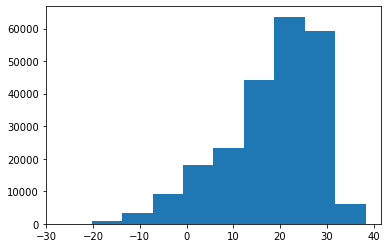

In [33]:
plt.hist(data['AverageTemperature'])

In [57]:
# now we see country wise analysis
country = data[data['Country'] == 'China']

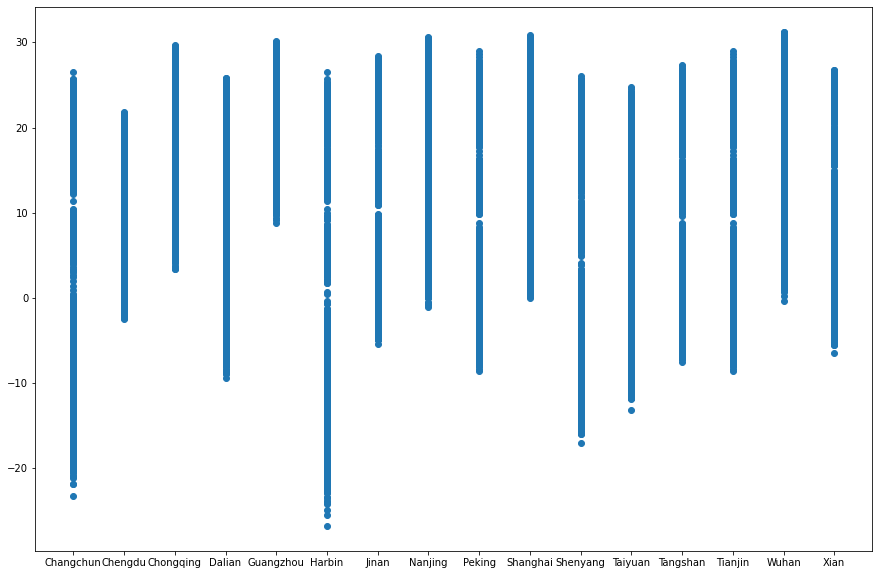

In [58]:
plt.figure(figsize=(15,10))
plt.scatter(country['City'],country['AverageTemperature'])

<BarContainer object of 34952 artists>

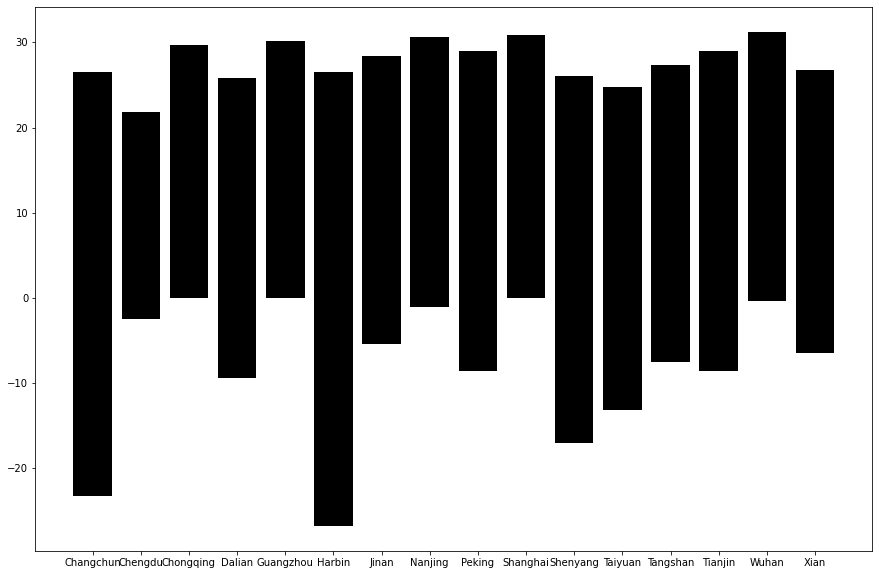

In [60]:
plt.figure(figsize=(15,10))
plt.bar(country['City'],country['AverageTemperature'],color='black')

<BarContainer object of 34952 artists>

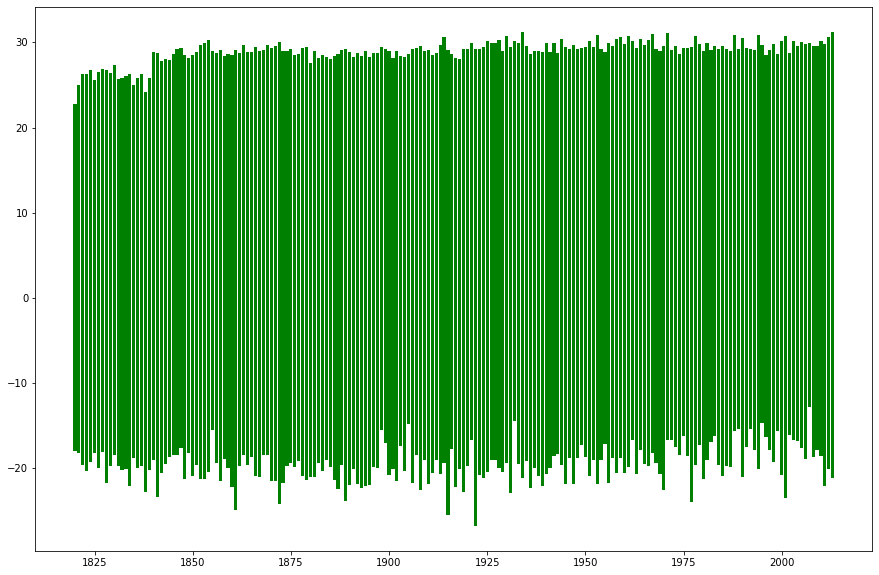

In [62]:
plt.figure(figsize=(15,10))
plt.bar(country['year'],country['AverageTemperature'],color='green')

In [61]:
country.head()

,AverageTemperature,City,Country,Latitude,Longitude,year,month,day
47038,19.674,Changchun,China,44.20N,125.22E,1820,8,1
47039,14.841,Changchun,China,44.20N,125.22E,1820,9,1
47040,4.825,Changchun,China,44.20N,125.22E,1820,10,1
47041,-5.807,Changchun,China,44.20N,125.22E,1820,11,1
47042,-15.398,Changchun,China,44.20N,125.22E,1820,12,1


In [63]:
year = data[data['year'] == 1820]

In [66]:
#now in this year data set there are only those values which are equal 1820 or some thing else
year.head()

,AverageTemperature,City,Country,Latitude,Longitude,year,month,day
4230,17.422,Ahmadabad,India,23.31N,72.52E,1820,1,1
4231,20.310,Ahmadabad,India,23.31N,72.52E,1820,2,1
4232,25.332,Ahmadabad,India,23.31N,72.52E,1820,3,1
4233,30.928,Ahmadabad,India,23.31N,72.52E,1820,4,1
4234,32.474,Ahmadabad,India,23.31N,72.52E,1820,5,1


<BarContainer object of 524 artists>

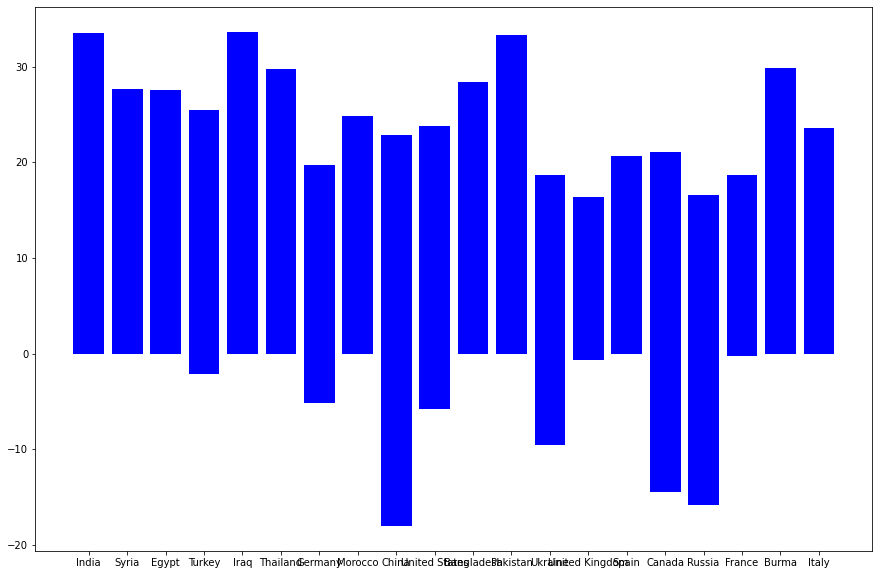

In [67]:
plt.figure(figsize=(15,10))
plt.bar(year['Country'],year['AverageTemperature'],color='blue')

In [68]:
# we also can perform it on mounth base
month = data[data['month'] == 7]
month.head()

,AverageTemperature,City,Country,Latitude,Longitude,year,month,day
6,24.058,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,7,1
18,24.040,Abidjan,Côte D'Ivoire,5.63N,3.23W,1850,7,1
30,24.318,Abidjan,Côte D'Ivoire,5.63N,3.23W,1851,7,1
90,24.031,Abidjan,Côte D'Ivoire,5.63N,3.23W,1856,7,1
102,24.090,Abidjan,Côte D'Ivoire,5.63N,3.23W,1857,7,1


Text(0, 0.5, 'AverageTemperature')

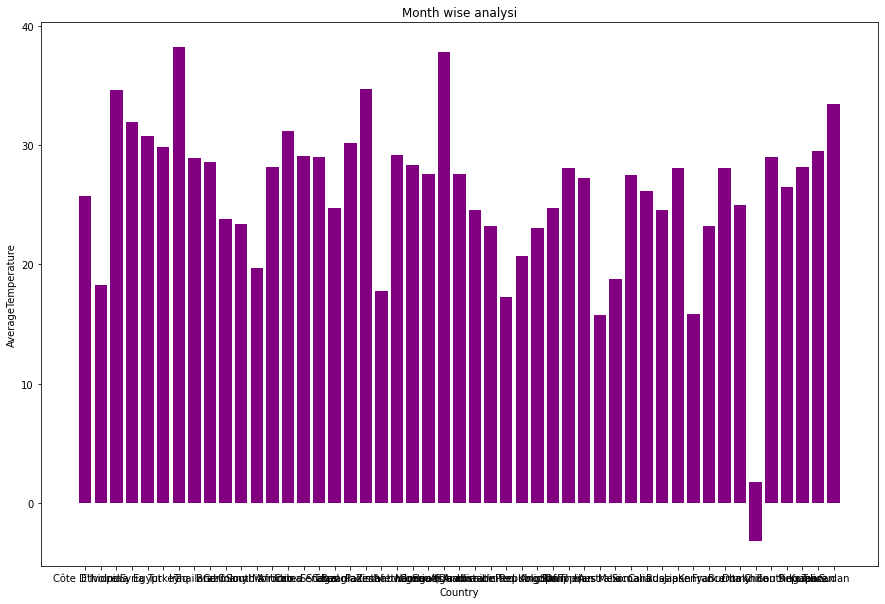

In [72]:
plt.figure(figsize=(15,10))
plt.bar(month['Country'],month['AverageTemperature'],color='purple')
plt.title('Month wise analysi')
plt.xlabel('Country')
plt.ylabel('AverageTemperature')

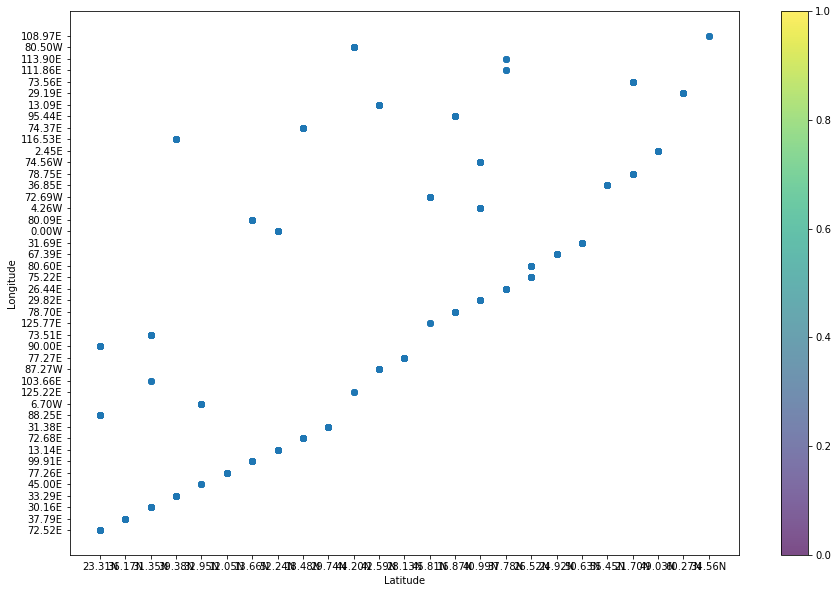

In [79]:
plt.figure(figsize=(15,10))
plt.scatter(year['Latitude'],year['Longitude'],cmap='jet',alpha=0.7)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar()

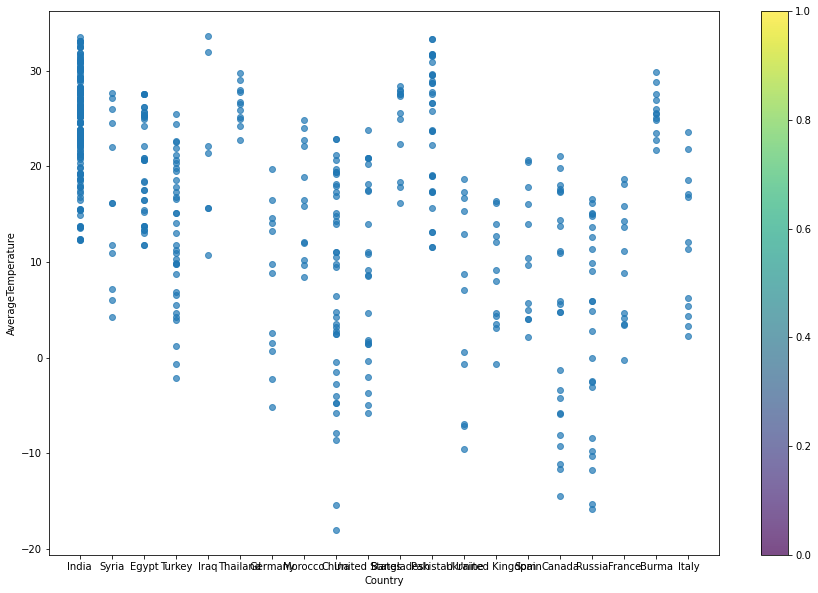

In [80]:
plt.figure(figsize=(15,10))
plt.scatter(year['Country'],year['AverageTemperature'],cmap='jet',alpha=0.7)
plt.xlabel('Country')
plt.ylabel('AverageTemperature')
plt.colorbar()

/tmp/ipykernel_4016/3323270994.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


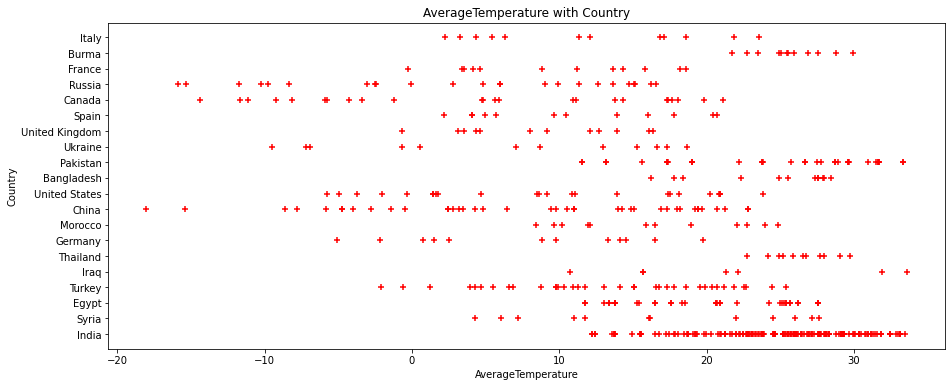

In [82]:
fig,ax = plt.subplots(figsize=(15,6))

ax.scatter(year['AverageTemperature'],year['Country'],color='red',marker='+')
ax.set_title('AverageTemperature with Country')
ax.set_xlabel('AverageTemperature')
ax.set_ylabel('Country')

fig.show()

<AxesSubplot:xlabel='Country', ylabel='Count'>

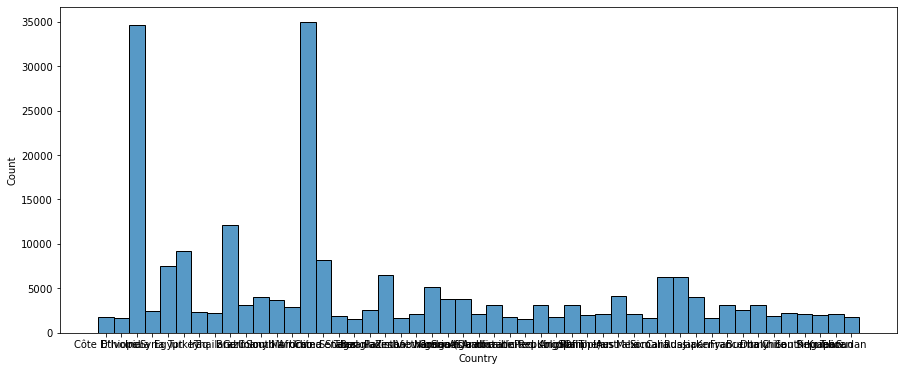

In [85]:
fig,ax = plt.subplots(figsize=(15,6))
sns.histplot(data=data,x='Country')

In [105]:
new_data = data.drop_duplicates(subset=['Country'])

<AxesSubplot:xlabel='year', ylabel='Country'>

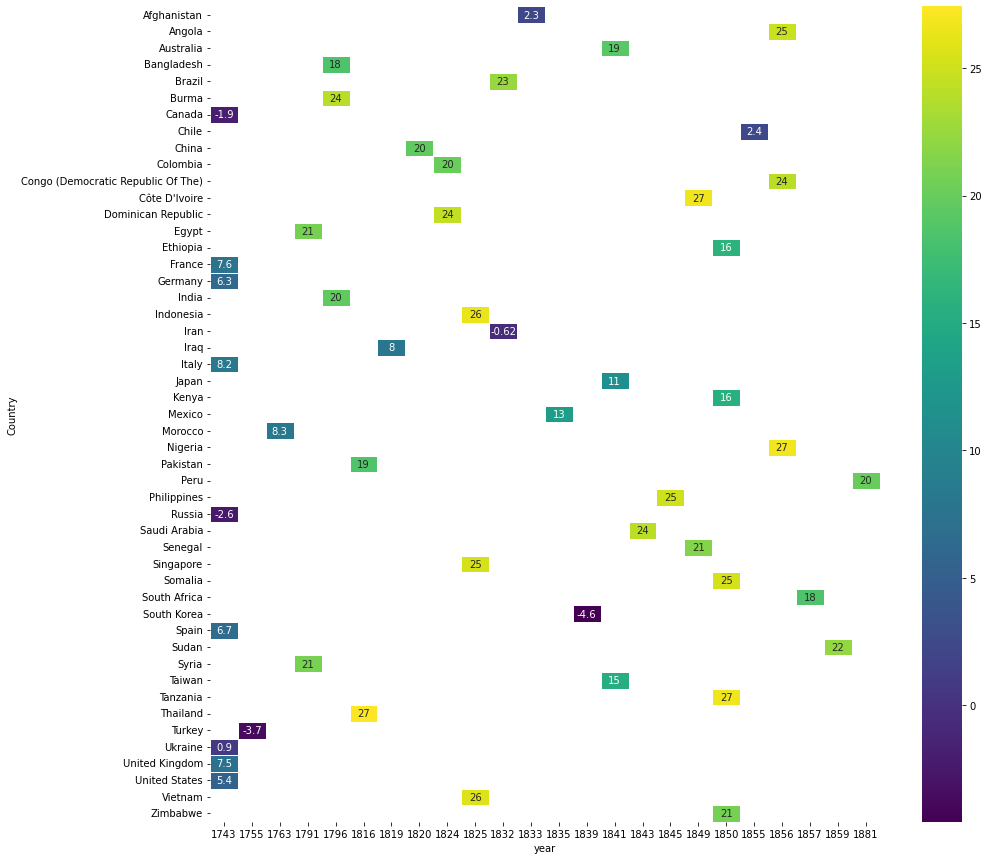

In [107]:
temp_df = new_data.pivot(index='Country',columns='year',values='AverageTemperature')
plt.figure(figsize=(15,15))
sns.heatmap(temp_df,annot=True,linewidths=0.5,cmap='viridis')

<AxesSubplot:xlabel='Country', ylabel='AverageTemperature'>

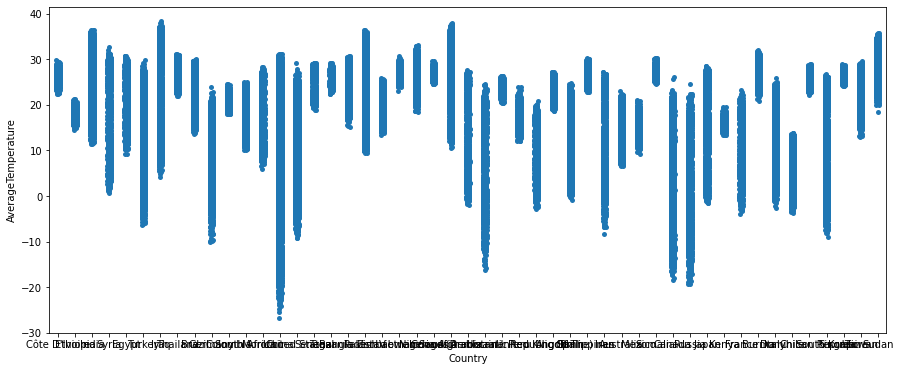

In [113]:
fig,ax = plt.subplots(figsize=(15,6))

sns.stripplot(data=data,x='Country',y='AverageTemperature')

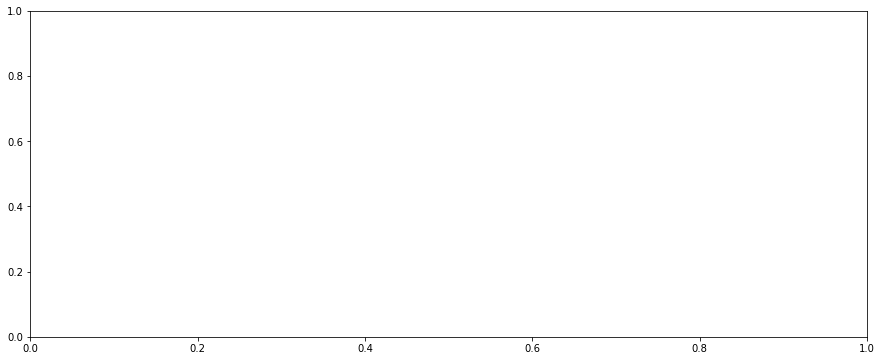

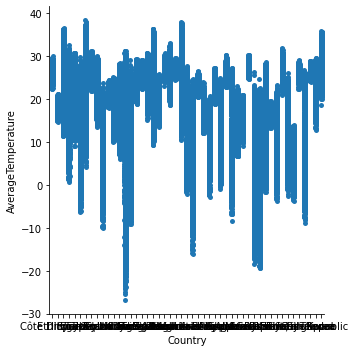

In [117]:
fig,ax = plt.subplots(figsize=(15,6))
sns.catplot(data=data,x='Country',y='AverageTemperature',kind='strip')

<AxesSubplot:xlabel='Country', ylabel='AverageTemperature'>

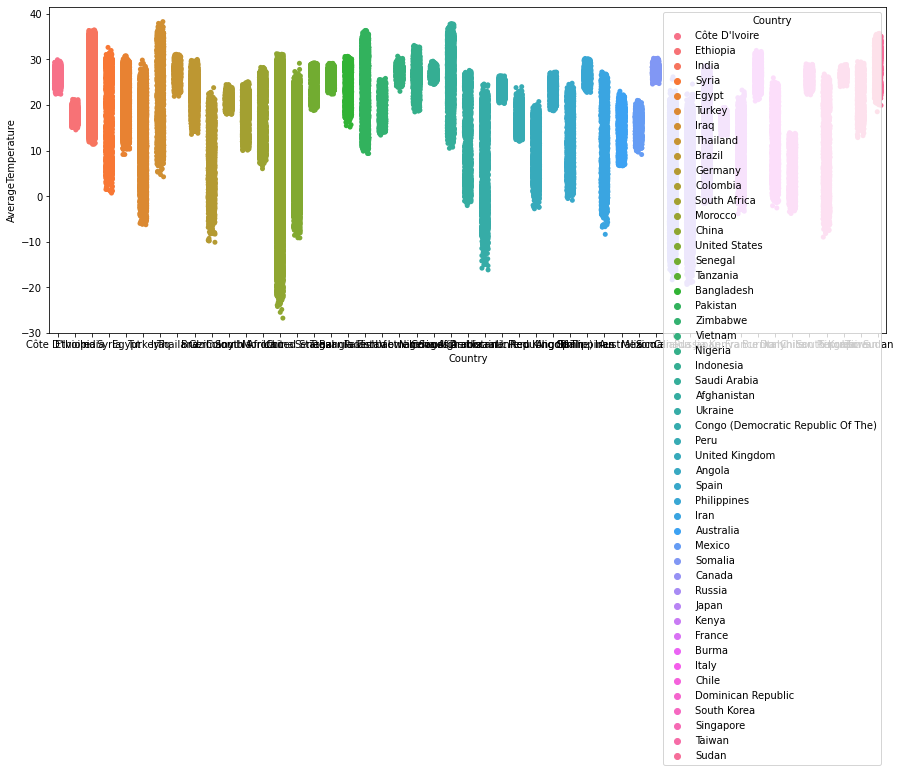

In [118]:
fig,ax = plt.subplots(figsize=(15,6))

sns.stripplot(data=data,x='Country',y='AverageTemperature',jitter=0.2,hue='Country')


<AxesSubplot:xlabel='City', ylabel='AverageTemperature'>

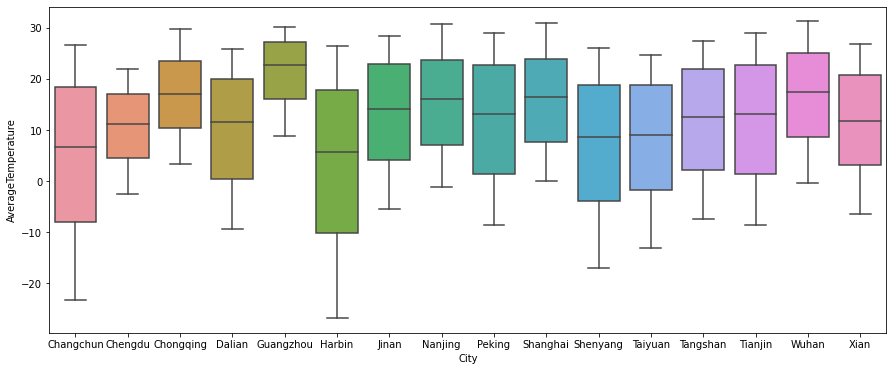

In [122]:
fig,ax = plt.subplots(figsize=(15,6))

sns.boxplot(data=country,x='City',y='AverageTemperature')

<AxesSubplot:xlabel='City', ylabel='AverageTemperature'>

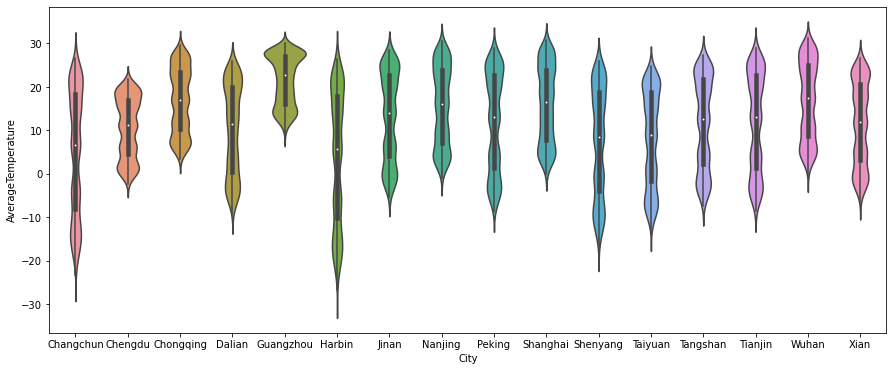

In [123]:
fig,ax = plt.subplots(figsize=(15,6))

sns.violinplot(data=country,x='City',y='AverageTemperature')

## Now its time to make some prediction

In [19]:
data.head()

,AverageTemperature,City,Country,Latitude,Longitude,year,month,day
0,26.704,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1,1
1,27.434,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,2,1
2,28.101,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,3,1
3,26.140,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,4,1
4,25.427,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,5,1


In [21]:
data['AverageTemperature'].unique()

array([26.704, 27.434, 28.101, ..., 16.775,  7.543, -0.49 ])

In [22]:
data['City'].unique()

array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam',
       'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh',
       'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad',
       'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah',
       'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa',
       'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles',
       'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne',
       'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur',
       'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking',
       'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome', 'São Paulo',
       'S

In [23]:
data['Country'].unique()

array(["Côte D'Ivoire", 'Ethiopia', 'India', 'Syria', 'Egypt', 'Turkey',
       'Iraq', 'Thailand', 'Brazil', 'Germany', 'Colombia',
       'South Africa', 'Morocco', 'China', 'United States', 'Senegal',
       'Tanzania', 'Bangladesh', 'Pakistan', 'Zimbabwe', 'Vietnam',
       'Nigeria', 'Indonesia', 'Saudi Arabia', 'Afghanistan', 'Ukraine',
       'Congo (Democratic Republic Of The)', 'Peru', 'United Kingdom',
       'Angola', 'Spain', 'Philippines', 'Iran', 'Australia', 'Mexico',
       'Somalia', 'Canada', 'Russia', 'Japan', 'Kenya', 'France', 'Burma',
       'Italy', 'Chile', 'Dominican Republic', 'South Korea', 'Singapore',
       'Taiwan', 'Sudan'], dtype=object)

In [57]:
data['Latitude'].unique()

array(['5.63N', '8.84N', '23.31N', '36.17N', '31.35N', '39.38N', '32.95N',
       '12.05N', '13.66N', '20.09S', '52.24N', '4.02N', '18.48N',
       '15.27S', '29.74N', '32.95S', '44.20N', '42.59N', '15.27N',
       '7.23S', '28.13N', '29.74S', '4.02S', '18.48S', '45.81N', '10.45N',
       '16.87N', '7.23N', '40.99N', '37.78N', '26.52N', '5.63S', '21.70N',
       '34.56N', '24.92N', '50.63N', '12.05S', '8.84S', '37.78S',
       '20.09N', '2.41N', '55.45N', '0.80S', '49.03N', '23.31S', '60.27N',
       '13.66S', '0.80N', '34.56S'], dtype=object)

In [58]:
data['Longitude'].unique()

array(['3.23W', '38.11E', '72.52E', '37.79E', '30.16E', '33.29E',
       '45.00E', '77.26E', '99.91E', '44.36W', '13.14E', '74.73W',
       '72.68E', '47.50W', '31.38E', '88.25E', '76.34W', '18.19E',
       '6.70W', '125.22E', '103.66E', '87.27W', '107.08E', '17.50W',
       '120.69E', '39.73E', '77.27E', '90.00E', '73.51E', '40.98W',
       '112.72E', '30.42E', '125.77E', '107.18E', '78.70E', '4.05E',
       '29.82E', '26.44E', '75.22E', '106.55E', '38.94E', '117.35E',
       '70.05E', '8.22E', '80.60E', '67.39E', '31.69E', '15.27E', '3.23E',
       '77.26W', '0.00W', '118.70W', '13.78E', '80.09E', '4.26W',
       '120.83E', '59.67E', '144.41E', '98.96W', '45.80E', '72.69W',
       '36.85E', '136.22E', '78.75E', '36.16E', '118.74E', '74.56W',
       '2.45E', '116.53E', '74.37E', '95.44E', '42.82W', '46.11E',
       '13.09E', '46.31W', '29.19E', '38.81W', '69.89W', '69.30W',
       '126.10E', '120.63E', '123.55E', '112.70E', '73.56E', '151.78E',
       '122.36E', '111.86E', '113.90E', 

In [59]:
data['Latitude_value']=data['Latitude']
data['Longitude_value'] = data['Longitude']
data['Latitude_direction'] = ''
data['Longitude_direction'] = ''
data.head()

,AverageTemperature,City,Country,Latitude,Longitude,year,month,day,Latitude_value,Longitude_value,Latitude_direction,Longitude_direction
0,26.704,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1,1,5.63N,3.23W,,
1,27.434,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,2,1,5.63N,3.23W,,
2,28.101,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,3,1,5.63N,3.23W,,
3,26.140,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,4,1,5.63N,3.23W,,
4,25.427,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,5,1,5.63N,3.23W,,


In [60]:
import re
## Use a regular expression to remove non-numeric characters and convert to float
data['Latitude_value'] = data['Latitude_value'].apply(lambda x: re.sub(r'[^0-9.-]', '', x))
data['Latitude_value'] = data['Latitude_value'].astype(float)

data['Longitude_value'] = data['Longitude_value'].apply(lambda x: re.sub(r'[^0-9.-]', '', x))
data['Longitude_value'] = data['Longitude_value'].astype(float)
data.head()

,AverageTemperature,City,Country,Latitude,Longitude,year,month,day,Latitude_value,Longitude_value,Latitude_direction,Longitude_direction
0,26.704,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1,1,5.63,3.23,,
1,27.434,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,2,1,5.63,3.23,,
2,28.101,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,3,1,5.63,3.23,,
3,26.140,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,4,1,5.63,3.23,,
4,25.427,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,5,1,5.63,3.23,,


In [61]:
data['Latitude_direction'] = data['Latitude'].apply(lambda x: re.sub(r'[0-9.-]', '', x))
data['Longitude_direction'] = data['Longitude'].apply(lambda x: re.sub(r'[0-9.-]', '', x))
data.head()

,AverageTemperature,City,Country,Latitude,Longitude,year,month,day,Latitude_value,Longitude_value,Latitude_direction,Longitude_direction
0,26.704,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1,1,5.63,3.23,N,W
1,27.434,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,2,1,5.63,3.23,N,W
2,28.101,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,3,1,5.63,3.23,N,W
3,26.140,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,4,1,5.63,3.23,N,W
4,25.427,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,5,1,5.63,3.23,N,W


In [64]:
data.drop(columns=['Latitude','Longitude'],inplace=True)

In [65]:
data.head()

,AverageTemperature,City,Country,year,month,day,Latitude_value,Longitude_value,Latitude_direction,Longitude_direction
0,26.704,Abidjan,Côte D'Ivoire,1849,1,1,5.63,3.23,N,W
1,27.434,Abidjan,Côte D'Ivoire,1849,2,1,5.63,3.23,N,W
2,28.101,Abidjan,Côte D'Ivoire,1849,3,1,5.63,3.23,N,W
3,26.140,Abidjan,Côte D'Ivoire,1849,4,1,5.63,3.23,N,W
4,25.427,Abidjan,Côte D'Ivoire,1849,5,1,5.63,3.23,N,W


In [66]:
data.dtypes

AverageTemperature     float64
City                    object
Country                 object
year                     int32
month                    int32
day                      int32
Latitude_value         float64
Longitude_value        float64
Latitude_direction      object
Longitude_direction     object
dtype: object

### now there is problem with Latitude and Longitude feature problem is its value is object and look like this {'80.60E'} but firt this value would be seprate like E seprate feature and 80.60 would be seprate feature and also change its data type into float

In [131]:
#selecting featuers
featuers =['Latitude_value','Longitude_value','Latitude_direction','Longitude_direction','year','month','day']
target_label = ['AverageTemperature']

In [132]:
# giving values to x and y
x=data[featuers]
y=data[target_label]

In [133]:
x = pd.get_dummies(x[['Latitude_value','Longitude_value','Latitude_direction','Longitude_direction','year','month','day']], columns=['Latitude_direction', 'Longitude_direction'],dtype=int,drop_first=True)

In [134]:
x.dtypes

Latitude_value           float64
Longitude_value          float64
year                       int32
month                      int32
day                        int32
Latitude_direction_S       int64
Longitude_direction_W      int64
dtype: object

In [135]:
x.head()

,Latitude_value,Longitude_value,year,month,day,Latitude_direction_S,Longitude_direction_W
0,5.63,3.23,1849,1,1,0,1
1,5.63,3.23,1849,2,1,0,1
2,5.63,3.23,1849,3,1,0,1
3,5.63,3.23,1849,4,1,0,1
4,5.63,3.23,1849,5,1,0,1


In [136]:
# traning anf testing data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [137]:
x_train.shape

(182540, 7)

In [138]:
x_test.shape

(45635, 7)

In [139]:
#using random forest model
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()

rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [140]:
#predicting accuracy
from sklearn.metrics import r2_score,mean_absolute_error
print("R2 score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMAE",np.sqrt(mean_absolute_error(y_test,y_pred)))

R2 score 0.9852632279833372
MAE 0.8056931144954529
RMAE 0.8976040967461395


In [147]:
rf.predict([[60.27,29.19,1823,3,1,0,0]])

/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([-3.30641])

In [142]:
y.head()

,AverageTemperature
0,26.704
1,27.434
2,28.101
3,26.140
4,25.427


In [143]:
x.sample(10)

,Latitude_value,Longitude_value,year,month,day,Latitude_direction_S,Longitude_direction_W
59527,39.38,120.69,1875,5,1,0,0
136567,13.66,80.09,1866,12,1,0,0
129256,52.24,0.00,1797,12,1,0,1
29008,4.02,74.73,1929,10,1,0,1
148905,20.09,98.96,1923,3,1,0,1
194393,60.27,29.19,1823,3,1,0,0
186873,24.92,46.11,1918,2,1,0,0
221528,37.78,111.86,1888,9,1,0,0
72619,31.35,73.51,2012,10,1,0,0
147504,37.78,144.41,1985,3,1,1,0


In [148]:
y.iloc[194393][0]

5.581

In [151]:
# using gradient boosting classifier
from sklearn.ensemble import GradientBoostingRegressor

GDC =GradientBoostingRegressor()

In [152]:
GDC.fit(x_train,y_train)

/home/user/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [155]:
y_pred=GDC.predict(x_test)

In [156]:
GDC.predict([[60.27,29.19,1823,3,1,0,0]])

/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([-3.52837111])

In [157]:
#predicting accuracy
from sklearn.metrics import r2_score,mean_absolute_error
print("R2 score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMAE",np.sqrt(mean_absolute_error(y_test,y_pred)))

R2 score 0.9201596428389845
MAE 2.1634868772193534
RMAE 1.4708796270325295


In [158]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [159]:
print("R2 score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMAE",np.sqrt(mean_absolute_error(y_test,y_pred)))

R2 score 0.9794135646327901
MAE 0.920350257477813
RMAE 0.9593488716196069


In [160]:
dt.predict([[60.27,29.19,1823,3,1,0,0]])

/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([-2.94])

In [161]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()

LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

In [162]:
print("R2 score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMAE",np.sqrt(mean_absolute_error(y_test,y_pred)))

R2 score 0.4230219451930306
MAE 6.074215313407359
RMAE 2.4645923219484716


In [171]:
LR.predict([[13.66,38.81,2009,1,1,1,1]])

/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[19.96064156]])

In [170]:
x.sample(10)

,Latitude_value,Longitude_value,year,month,day,Latitude_direction_S,Longitude_direction_W
227043,39.38,116.53,1961,12,1,0,0
115048,50.63,31.69,1754,4,1,0,0
230338,44.20,80.50,1797,11,1,0,1
94698,37.78,26.44,1853,5,1,0,0
51351,31.35,103.66,1986,11,1,0,0
203307,37.78,126.10,1861,5,1,0,0
193168,23.31,46.31,1991,1,1,1,1
87431,16.87,78.70,1936,3,1,0,0
58679,15.27,17.50,1989,2,1,0,1
164265,0.80,36.16,1945,8,1,1,0


In [166]:
y.iloc[198804][0]

24.473000000000003

### now we can see Linear Regression is performing good

### now we convert our model into pickle

In [167]:
import pickle
pickle.dump(LR,open('globle_temp.pkl','wb'))

In [172]:
x.dtypes

Latitude_value           float64
Longitude_value          float64
year                       int32
month                      int32
day                        int32
Latitude_direction_S       int64
Longitude_direction_W      int64
dtype: object